In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score,confusion_matrix
import statsmodels.api as sm

In [123]:
back_data = pd.read_csv('Dataset_spine.csv')

In [124]:

back_data.drop(columns='Unnamed: 13',inplace=True)

In [125]:
back_data.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

In [126]:
# understanding the columns
back_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
pelvic_incidence            310 non-null float64
pelvic tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
Direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
Status                      310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [127]:
#checking missing values
back_data.isnull().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64

In [128]:
back_data.describe()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


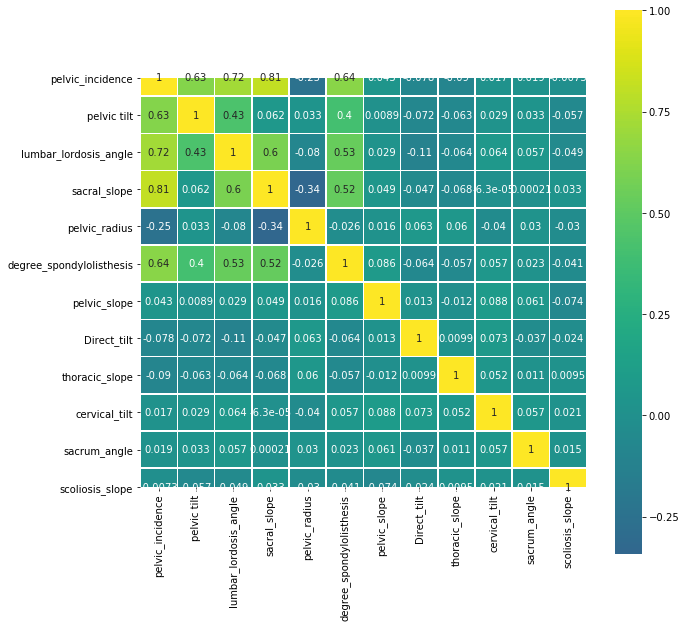

In [129]:
corr_back = back_data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_back,cmap='viridis',annot=True,center=0,square=True,linewidth = 0.5)

In [130]:
back_data.groupby('Status').mean()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
Normal,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528711,26.694019


In [131]:
back_data.groupby('Status').median()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,65.274888,18.798899,56.150000,44.639597,115.650323,31.946516,0.501280,21.7506,12.77005,11.973735,-14.892070,24.50940
Normal,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710,0.418732,22.4146,13.40975,11.330750,-13.974694,27.72795


The first six variables have a noticeable difference in the means corresponding to Normal and abnormal

The mean corresponding to Abnormal for degree_spondylolisthesis is quite higher than the corresponding median This could be due to outliers

pelvic radius lower value for abnormal as compared to normal


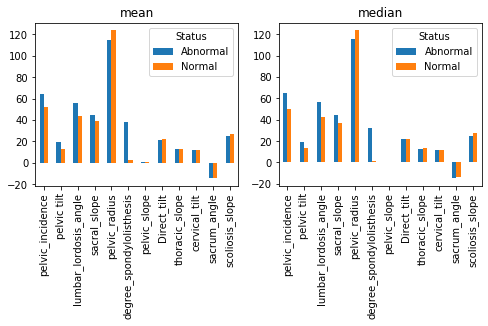

In [132]:
fig = plt.figure(figsize = (8,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
data_diff_mean = back_data.groupby('Status').mean()
data_diff_mean.T.plot(kind='bar',ax = ax1)
ax1.set_title('mean')

data_diff_median = back_data.groupby('Status').median()
data_diff_median.T.plot(kind='bar',ax=ax2)
ax2.set_title('median')
plt.show()

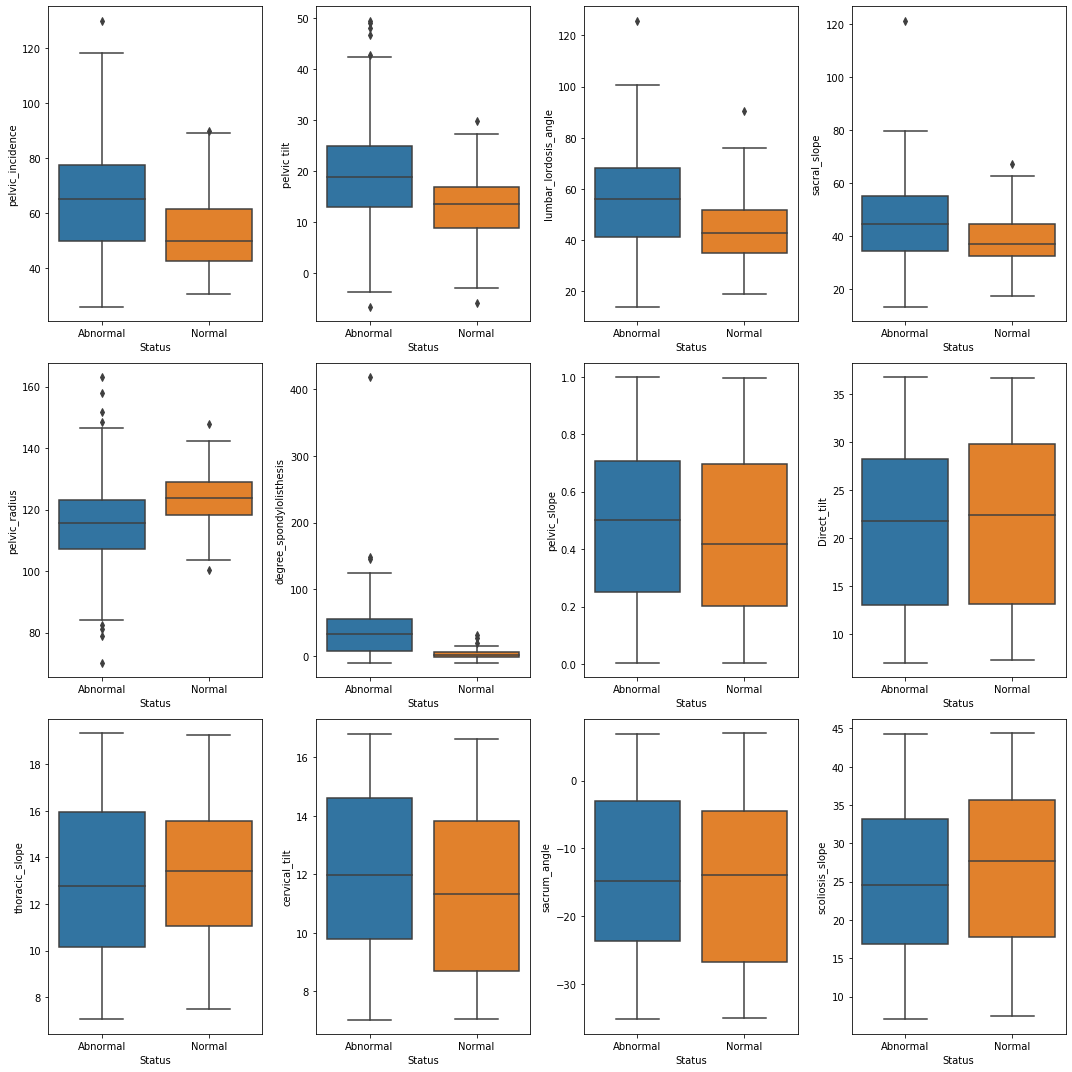

In [133]:
#again lets use boxplots for above observations
fig,ax = plt.subplots(3,4,figsize = (15,15))
ax = ax.flatten()
for i in range(0,len(back_data.columns)-1): # we use -1 because we start from 0 
    sns.boxplot(x='Status',y = back_data.iloc[:,i],data=back_data,ax = ax[i],orient='v')
plt.tight_layout()

In [134]:
back_data['Status'] =  back_data['Status'].apply(lambda x: 1 if x == 'Abnormal' else 0)


In [135]:
back_data

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,0


In [136]:
X = back_data.loc[:,back_data.columns != 'Status']
y = back_data.loc[:,back_data.columns == 'Status'].values.ravel()

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [138]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [139]:
logreg.score(X_train,y_train)

0.8709677419354839

In [140]:
logreg.score(X_test,y_test)

0.7741935483870968

In [141]:
#lets explain this model
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
result.summary2()

         Current function value: 0.473055
         Iterations: 35


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.248     
Dependent Variable:   y                 AIC:               229.3058  
Date:                 2020-01-27 17:32  BIC:               269.8646  
No. Observations:     217               Log-Likelihood:    -102.65   
Df Model:             11                LL-Null:           -136.45   
Df Residuals:         205               LLR p-value:       3.4943e-10
Converged:            0.0000            Scale:             1.0000    
No. Iterations:       35.0000                                        
---------------------------------------------------------------------
     Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------
x1   0.0814 16376722.9459  0.0000 1.0000 -32097787.0775 32097787.2402
x2   0.0765  9334644.7787  0.0000 1.0000 -18295567.4983 18295567.6514
x3  -0.2797        0.3142 -0.8903 0.3733        -0.8955        0.3361
x4  -0.5412 12885437.8024 -0.0000 1.0000 -25254994.5590 25254993.4766
x5  -1.1234        0.2351 -4.7773 0.0000        -1.5842       -0.6625
x6   2.3250        0.4401  5.2832 0.0000         1.4625        3.1875
x7   0.1711        0.1790  0.9561 0.3390        -0.1797        0.5220
x8  -0.2115        0.1770 -1.1950 0.2321        -0.5583        0.1354
x9   0.0724        0.1738  0.4166 0.6770        -0.2683        0.4131
x10  0.2003        0.1772  1.1301 0.2584        -0.1471        0.5476
x11 -0.1042        0.1804 -0.5778 0.5634        -0.4578        0.2493
x12 -0.2749        0.1764 -1.5579 0.1193        -0.6207        0.0709
=====================================================================

"""

In [142]:
#removing highly corelated columns which also have high standard error
cols_to_include = [cols for cols in X.columns if cols not in ['pelvic_incidence','pelvic tilt','sacral_slope']]
X = back_data[cols_to_include]


In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [144]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [145]:
logreg.score(X_train,y_train)

0.847926267281106

In [146]:
logreg.score(X_test,y_test)

0.7849462365591398

In [147]:
#lets get statistical summary of above model
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.481933
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.234     
Dependent Variable: y                AIC:              227.1591  
Date:               2020-01-27 17:32 BIC:              257.5781  
No. Observations:   217              Log-Likelihood:   -104.58   
Df Model:           8                LL-Null:          -136.45   
Df Residuals:       208              LLR p-value:      8.5613e-11
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.5434      0.2568    -2.1158    0.0344    -1.0468    -0.0400
x2    -0.9642      0.2080    -4.6364    0.0000    -1.3719    -0.5566
x3     2.2963      0.4142     5.5443    0.0000     1.4846     3.1081
x4     0.1499      0.1771     0.8464    0.3974    -0.1972     0.4971
x5    -0.2442      0.1738    -1.4047    0.1601    -0.5849     0.0965
x6     0.0640      0.1732     0.3694    0.7118    -0.2754     0.4034
x7     0.2068      0.1747     1.1841    0.2364    -0.1355     0.5491
x8    -0.1183      0.1777    -0.6660    0.5054    -0.4666     0.2299
x9    -0.2872      0.1736    -1.6547    0.0980    -0.6274     0.0530
=================================================================

"""

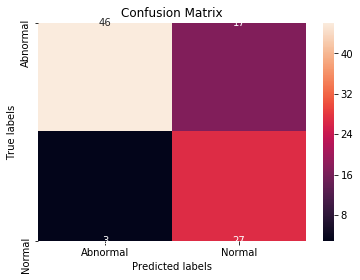

In [151]:
y_pred = logreg.predict(X_test)
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'
y_test_string[np.where(y_test_string =='0')] = 'Normal'

from sklearn.metrics import confusion_matrix
ax = plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string,y_pred_string)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Abnormal','Normal'])
ax.yaxis.set_ticklabels(['Abnormal','Normal'])
plt.show()

In [155]:
logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'penalty': 'l1'}
accuracy : 0.8248847926267281


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:

In [159]:
from sklearn.model_selection import GridSearchCV
